# Assgniment - 3
# Stereo Correspondence

### Parth Partani
### 20161034

### In this Assignment, given a pair of stereo images we will finding stereo correspondences through Dense SIFT based matching and Intensity Window-based Correlation.

## Question : 1
### Dense SIFT-based matching

In [1]:
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt
import os

In [8]:
def denseDescript(image, step):
    sift = cv2.xfeatures2d.SIFT_create()
    keypoint = [cv2.KeyPoint(x, y, step) for y in range(0, image.shape[0], step) 
                                        for x in range(0, image.shape[1], step)]
    des = sift.compute(image, keypoint)
    return keypoint,des

In [251]:
def Mappings(image1,image2,des1,des2,kp1,kp2,fact):
    FLANN_INDEX = 1
    index_params = dict(algorithm = FLANN_INDEX, trees = 5)
    search_params = dict(checks=50)
    
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(np.asarray(des1,np.float32),np.asarray(des2,np.float32),k=2)
    good, List = [], []
    im1_points, im2_points = [], []
    for m,n in matches:
        if m.distance < fact*n.distance:
            good.append([m])
            (x1, y1) = kp1[m.queryIdx].pt
            (x2, y2) = kp2[m.trainIdx].pt
            im1_points.append([x1,y1,1])
            im2_points.append([x2,y2,1])
            List.append([x1, y1, x2, y2])
            
    p1 = np.array(im1_points)
    p2 = np.array(im2_points)
    img = cv2.drawMatchesKnn(im1,kp1,im2,kp2,good,None,flags=2)
#     plt.figure(figsize=[10,10])
    plt.title("Mapping between the two image descriptors")
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return p1,p2,good

In [252]:
def detect(image1, image2, fact):
    gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
    kp1, des1 = denseDescript(gray1, 15)
    kp2, des2 = denseDescript(gray2, 15)
    
    p1,p2,good = Mappings(gray1,gray2,des1[1],des2[1],kp1,kp2,fact)
    return p1, p2

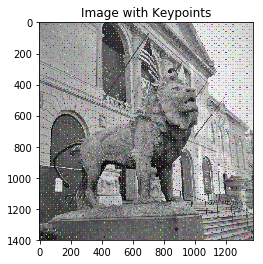

In [250]:
i = cv2.imread('./Stereo_Images/img11.jpg')
g = cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
k, _ = descript(g, 15)
keyp = cv2.drawKeypoints(gray1,kp1, im1)
plt.title("Image with Keypoints")
plt.imshow(keyp)
plt.show()

Image Set - 1

In dense sift matching:
* Sample points at the frequency of 30 pixels. 
* These points are considered to be keypoints and then find sift descriptors for the given keypoints.
* These keypoints are then passed through a FLANN knn matcher which provides with best point correspondences and plots corresponding points between these pair of images.

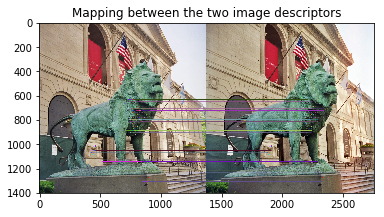

In [253]:
im1 = cv2.imread('./Stereo_Images/img11.jpg')
im2 = cv2.imread('./Stereo_Images/img12.jpg')
matrix11 = detect(im1, im2, 0.2)

Image Set - 2

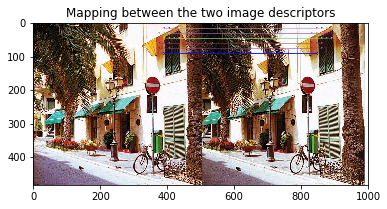

In [254]:
im1 = cv2.imread('./Stereo_Images/img21.jpg')
im2 = cv2.imread('./Stereo_Images/img22.jpg')
matrix12 = detect(im1, im2, 0.2)

Image Set - 3

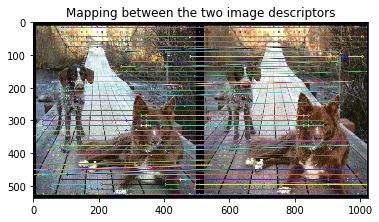

In [255]:
im1 = cv2.imread('./Stereo_Images/img31.jpg')
im2 = cv2.imread('./Stereo_Images/img32.jpg')
matrix13 = detect(im1, im2, 0.8)

## Question : 2
### Intensity Window-based correlation

In Intensity Window method :
* Instead of computing SIFT descriptors we use a window of size 30 and use its pixel values as a flattened descriptor.
* These descriptors are then normalized in range [-1,1]to accomodate for illumination changes.
* After finding these descriptors, a FLANN knn matcher is used which provides best point correspondences.

In [18]:
def intensityDescript(image, kp, step):
    desc, kp_intensity = [], []
    for i in kp:
        (x,y) = i.pt
        if (x + step <= image.shape[0] and y + step <= image.shape[1]):
            kp_intensity.append(i)
            x,y = int(x), int(y) 
            a = np.float32(image[x:x + step, y:y + step].flatten())
            m = np.mean(a)
            a -= m
            div = np.linalg.norm(a)
            if div != 0: desc.append(a/div)
    return kp_intensity ,desc

In [256]:
def Intensity(image1, image2, fact):
    gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
    
    kp1, _ = denseDescript(gray1, 30)
    kp2, _ = denseDescript(gray2, 30)
    
    kp1, des1 = intensityDescript(gray1, kp1, 30)
    kp2, des2 = intensityDescript(gray2, kp2, 30)
    p1,p2,good = Mappings(image1,image2,des1,des2,kp1,kp2,fact)
    return p1, p2

Image Set - 1

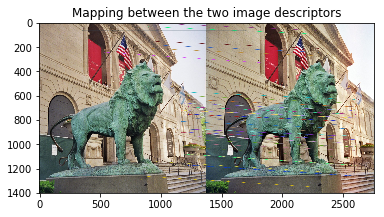

In [257]:
im1 = cv2.imread('./Stereo_Images/img11.jpg')
im2 = cv2.imread('./Stereo_Images/img12.jpg')
matrix21 = Intensity(im1, im2, 0.5)

Image Set - 2

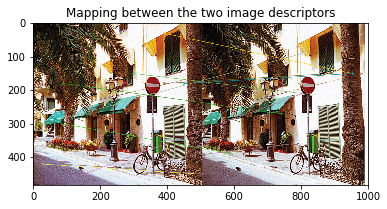

In [258]:
im1 = cv2.imread('./Stereo_Images/img21.jpg')
im2 = cv2.imread('./Stereo_Images/img22.jpg')
matrix22 = Intensity(im1, im2, 0.8)

Image Set - 3

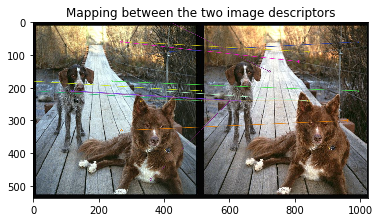

In [259]:
im1 = cv2.imread('./Stereo_Images/img31.jpg')
im2 = cv2.imread('./Stereo_Images/img32.jpg')
matrix23 = Intensity(im1, im2, 0.8)

## Question : 3
### Homography Matrix

* As we can see in the above methods that although these are stereo images, still correspondences through intensity window based method are not parallel.
* Also it can be seen that homography images in case of DENSE SIFT are better as compared to the Intensity SIFT method because there is not much change in the Dense one, whereas image in intensity method suffer a perspective change. 

* Image Set - 1

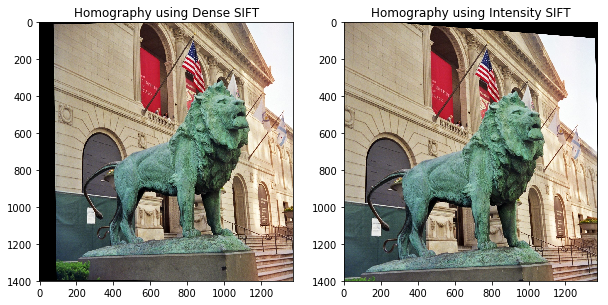

In [260]:
im1 = cv2.imread('./Stereo_Images/img11.jpg')
im2 = cv2.imread('./Stereo_Images/img12.jpg')
Homo11, status1 = cv2.findHomography(matrix11[0], matrix11[1])
out1 = cv2.warpPerspective(im2, Homo11, (im1.shape[1],  im1.shape[0]))

Homo12, status1 = cv2.findHomography(matrix21[0], matrix21[1])
out2 = cv2.warpPerspective(im2, Homo12, (im1.shape[1],  im1.shape[0]))
plt.figure(figsize=[10, 10])
plt.subplot(1, 2, 1)
plt.title("Homography using Dense SIFT")
out1 = cv2.cvtColor(out1, cv2.COLOR_BGR2RGB)
plt.imshow(out1)

plt.subplot(1, 2, 2)
plt.title("Homography using Intensity SIFT")
out2 = cv2.cvtColor(out2, cv2.COLOR_BGR2RGB)
plt.imshow(out2)
plt.show()

* Image Set - 2

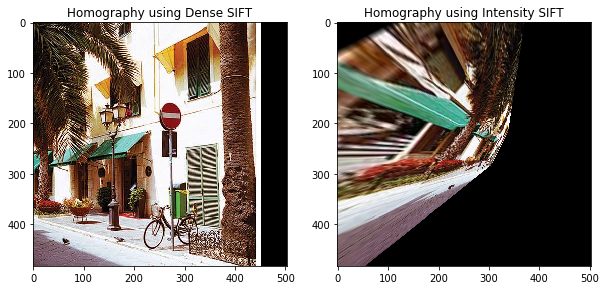

In [269]:
im1 = cv2.imread('./Stereo_Images/img21.jpg')
im2 = cv2.imread('./Stereo_Images/img22.jpg')
Homo21, status1 = cv2.findHomography(matrix12[0], matrix12[1])
out1 = cv2.warpPerspective(im2, Homo21, (im1.shape[1],  im1.shape[0]))

Homo22, status1 = cv2.findHomography(matrix22[0], matrix22[1])
out2 = cv2.warpPerspective(im2, Homo22, (im1.shape[1],  im1.shape[0]))
plt.figure(figsize=[10, 10])
plt.subplot(1, 2, 1)
plt.title("Homography using Dense SIFT")
out1 = cv2.cvtColor(out1, cv2.COLOR_BGR2RGB)
plt.imshow(out1)

plt.subplot(1, 2, 2)
plt.title("Homography using Intensity SIFT")
out2 = cv2.cvtColor(out2, cv2.COLOR_BGR2RGB)
plt.imshow(out2)
plt.show()

## Question : 4
### Rectification

In [270]:
def Rectify(img1,img2):
    sift = cv2.xfeatures2d.SIFT_create()
    kp1, desc1 = sift.detectAndCompute(img1,None)
    kp2, desc2 = sift.detectAndCompute(img2,None)
    flag1 = 0
    p1, p2, _ = Mappings(img1,img2,desc1,desc2,kp1,kp2,0.9)
    p1 = np.int32(p1)
    p2 = np.int32(p2)
    F, mask = cv2.findFundamentalMat(p1,p2,cv2.FM_LMEDS)
    
    p1 = p1[mask.ravel()==1]
    p2 = p2[mask.ravel()==1]
    p,H1,H2 = cv2.stereoRectifyUncalibrated(p1,p2,F,None,None,img1.shape, threshold=50)
    # H = np.matmul(H1,H2)
    img1_corrected = cv2.warpPerspective(img1, H1, (img1.shape[1],img1.shape[0]))
    img2_corrected = cv2.warpPerspective(img2, H2, (img2.shape[1],img2.shape[0]))
    plt.figure(figsize=[10, 10])
    plt.subplot(1, 2, 1)
    plt.title("Rectified Image 1")
    plt.imshow(cv2.cvtColor(img1_corrected, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title("Rectified Image 2")
    plt.imshow(cv2.cvtColor(img2_corrected, cv2.COLOR_BGR2RGB))
    plt.show()
    return img1_corrected, img2_corrected

* Image Set - 1

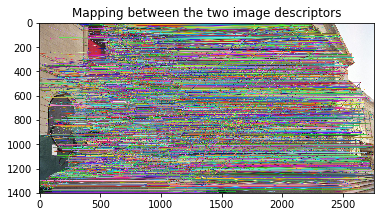

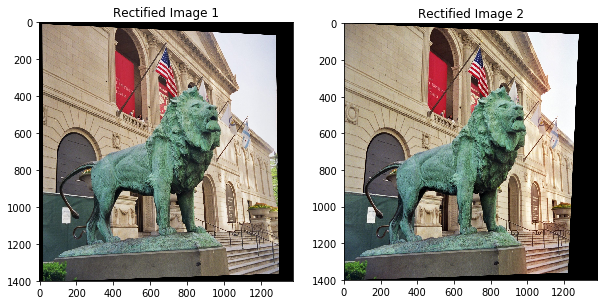

In [272]:
im1 = cv2.imread('./Stereo_Images/img11.jpg')
im2 = cv2.imread('./Stereo_Images/img12.jpg')
im1, im2 = Rectify(im1, im2)

* After rectifying the images we perform all the above operations again and then plot the results of the above methods.
* Also after rectification similar point correspondence becomes parallel.

* Image Set - 2

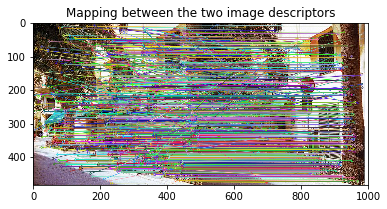

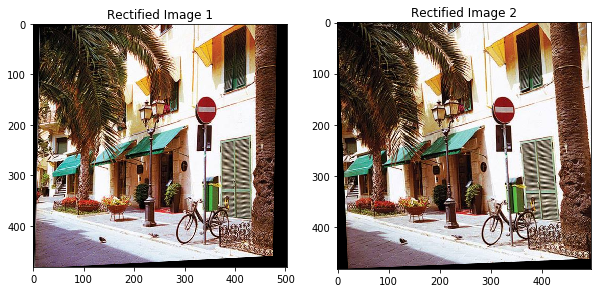

In [277]:
im1 = cv2.imread('./Stereo_Images/img21.jpg')
im2 = cv2.imread('./Stereo_Images/img22.jpg')
im1, im2 = Rectify(im1, im2)

* Image Set- 3

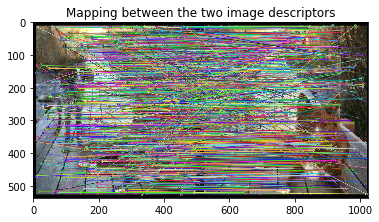

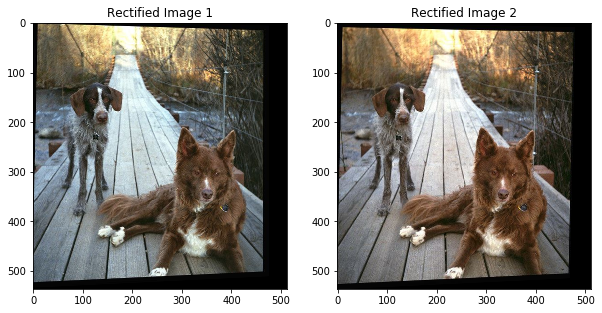

In [281]:
im1 = cv2.imread('./Stereo_Images/img31.jpg')
im2 = cv2.imread('./Stereo_Images/img32.jpg')
im1, im2 = Rectify(im1, im2)

## Question - 5
### Greedy Matching and DTW on the Rectified images

In general, DTW is a method that calculates an optimal match between two given sequences (e.g. time series) with certain restriction and rules:
* Every index from the first sequence must be matched with one or more indices from the other sequence, and vice versa.
* The first index from the first sequence must be matched with the first index from the other sequence (but it does not have to be its only match).
* The last index from the first sequence must be matched with the last index from the other sequence (but it does not have to be its only match).
* The mapping of the indices from the first sequence to indices from the other sequence must be monotonically increasing, and vice versa.